In [9]:
import keras
from training_ann import read_all_no_ss, ANNInputParams, ANNOutputParams

# 추론 모드 정의
INFERENCE_MODE = "petg_only"

# 테스트 데이터셋 열 이름 정의
output_params = ANNOutputParams

# 테스트 데이터셋 로드
abspla_dataset = read_all_no_ss(table_filename="table.csv")
petg_train_dataset = read_all_no_ss(table_filename="train_petg.csv")
petg_test_dataset = read_all_no_ss(table_filename="test_petg.csv")

# 테스트 데이터셋 전처리
if INFERENCE_MODE == "petg_only":
    test_dataset = petg_test_dataset
else:
    raise ValueError(f"Unknown inference mode: {INFERENCE_MODE}")

test_inputs = test_dataset[ANNInputParams].dropna().to_numpy(dtype=float)
test_labels = test_dataset[ANNOutputParams].dropna().to_numpy(dtype=float)
test_inputs.shape, test_labels.shape

[2023-10-26 17:09:04,389] nn.schemas:DEBUG - ===== Number of valid data: 270 =====
[2023-10-26 17:09:04,391] nn.schemas:DEBUG - ===== Number of valid data: 24 =====
[2023-10-26 17:09:04,395] nn.schemas:DEBUG - ===== Number of valid data: 31 =====


((31, 9), (31, 3))

In [16]:
import pandas as pd

# 추론 모델 이름 정의
INFERENCE_MODEL_NAME = "output\\MODE2\\ANN_E9378[LR=0.005][N1=40][N2=30][N3=10].keras"

# 추론 모델 로드
INFERENCE_MODEL = keras.models.load_model(INFERENCE_MODEL_NAME)
assert (
    INFERENCE_MODEL is not None
), f"Failed to load model: {INFERENCE_MODEL_NAME}"

# 추론 모델 추론
test_predictions = INFERENCE_MODEL.predict(test_inputs)

def compare_arrays_with_dataframe(pred, true, cols):
    # Shape와 길이 확인
    assert pred.shape == true.shape, "The shape of pred and true arrays should be the same"
    assert len(cols) == pred.shape[1], "Number of columns should match the shape of the arrays"
    
    data = {}
    for idx, col_name in enumerate(cols):
        data[f"예측된 {col_name}"] = pred[:, idx]
        data[f"실제 {col_name}"] = true[:, idx]
    
    df = pd.DataFrame(data)
    return df


compare_arrays_with_dataframe(test_predictions, test_labels, output_params)

1/1 [==============================] - 0s 35ms/step


,예측된 strength,실제 strength,예측된 lengthavg,실제 lengthavg,예측된 weight,실제 weight
0,1.392554,1.230,6.978096,2.630003,1.601884,1.44
1,1.392554,1.060,6.978096,2.272579,1.601884,1.39
2,1.392554,0.997,6.978096,2.793869,1.601884,1.33
3,1.458814,1.567,7.685302,2.087593,1.628397,1.69
4,1.458814,1.523,7.685302,1.826151,1.628397,1.67
5,1.458814,1.437,7.685302,2.105108,1.628397,1.66
6,1.282341,0.780,5.801762,5.908892,1.557782,1.03
7,1.282341,0.803,5.801762,5.715068,1.557782,1.04
8,1.282341,0.653,5.801762,4.770088,1.557782,1.03
9,1.309272,0.957,3.997025,3.105055,1.551247,1.28


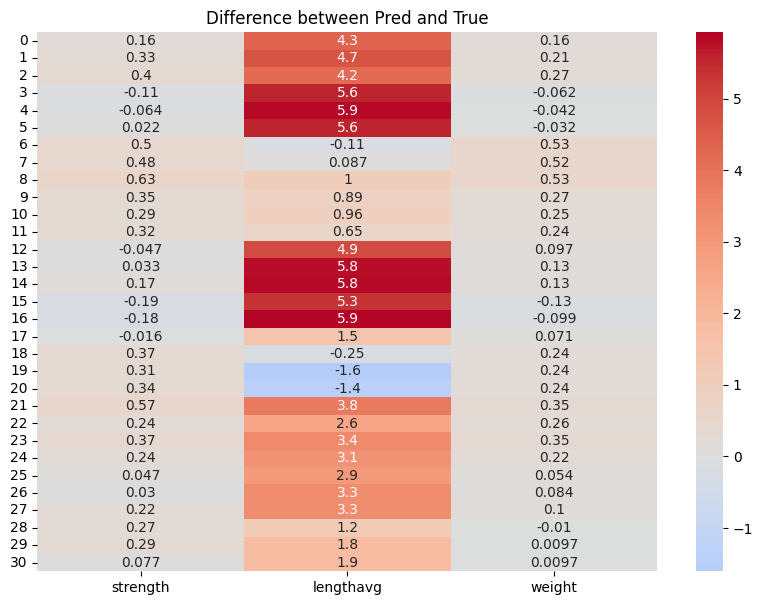

In [18]:
# 시각화

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_difference(pred, true, cols):
    # Shape와 길이 확인
    assert pred.shape == true.shape, "The shape of pred and true arrays should be the same"
    assert len(cols) == pred.shape[1], "Number of columns should match the shape of the arrays"

    # 차이 계산
    diff = np.array(pred) - np.array(true)

    # heatmap으로 차이 표시
    plt.figure(figsize=(10, 7))
    sns.heatmap(diff, annot=True, cmap='coolwarm', center=0, xticklabels=cols)
    plt.title("Difference between Pred and True")
    plt.show()

visualize_difference(test_predictions, test_labels, output_params)